# 1.회귀분석

In [1]:
import statsmodels.api as sm
from scipy.stats import bartlett, levene, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

sklearn 패키지의 datasets 패키지는 회귀분석용 예제 제공 <br>
load_boston()은 보스턴 주택 가격 데이터 예측을 위한 데이터 셋 <br> 보스턴의 506개 타운 13개 독립변수 값으로 해당 타운의 주택가격 중앙값을 예측. 

> 독립변수 <br>
CRIM: 범죄율 <br>
INDUS: 비소매상업지역 면적 비율 <br>
NOX: 일산화질소 농도 <br>
RM: 주택당 방 수 <br>
LSTAT: 인구 중 하위 계층 비율 <br>
B: 인구 중 흑인 비율 <br>
PTRATIO: 학생/교사 비율 <br>
ZN: 25,000 평방피트를 초과 거주지역 비율 <br>
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0 <br>
AGE: 1940년 이전에 건축된 주택의 비율 <br>
RAD: 방사형 고속도로까지의 거리 <br>
DIS: 직업센터의 거리 <br>
TAX: 재산세율 <br>

>종속변수 <br>
보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

## 1.1 EDA

데이터 분석 전 그래프나 통계적인 방법으로 자료를 직관적으로 바라보는 과정 <br>
주로 시각화를 통한 방법을 사용 <br>
<br>

최소한 아래의 내용 확인 <br>
- 데이터의 이상치, 결측치 등을 확인
- 데이터의 분포가 어떠한지 확인
- 데이터 간 패턴 등을 파악

P > |t| : P-VALUE(피 밸류)

In [84]:
data = load_boston()

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [85]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [86]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [87]:
import pandas as pd

In [88]:
data.get('data')

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [89]:
data.get('data').shape

(506, 13)

In [90]:
data.get('target')

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [91]:
data.get('feature_names')

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [92]:
date = pd.concat([
    pd.DataFrame(data.get('data'), columns=data.get('feature_names')),
    pd.DataFrame(data.get('target'), columns=['target'])
],
axis=1
)


In [93]:
data.get('DESCR')

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

기술통계량

In [94]:
date.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


boxplot

In [95]:
date.boxplot()

<AxesSubplot:>

산포도 그래프

In [96]:
sns.pairplot(date)

상관개수표 만들기

In [97]:
date.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [98]:
sns.heatmap(
    date.corr(),
    cmap='Reds'
)

<AxesSubplot:>

## 1.2 Modeling

모델을 구축하는 과정으로 EDA를 통해 확인한 내용을 반영하여 모델 구축 <br>

statsmodel에서 두 가지 방법으로 사용 가능
```python
model = sm.OLS(y, x).fit()
```

```python
model = sm.OLS.from_formula("y ~ x", data).fit()
```
<br>

위의 from_formula는 다양한 활용 가능 <br>
- scale 
```python
model = sm.OLS.from_formula("y ~ scale(x)", data).fit()
```
- $x^2$
```python
model = sm.OLS.from_formula("y ~ I(x ** 2)", data).fit()
```
- 범주화
```python
model = sm.OLS.from_formula("y ~ C(x)", data).fit()
```
<br>



모델 결과는 아래의 내용으로 해석
- R-squared
설명하고자 하는 y를 주어진 독립변수로 얼마 정도 설명할 수 있는지 나타내는 지표 <br>
범위는 0에서 1사이의 값으로 0이면 모델의 설명력이 전혀 없는 상태이고, 1에 가까울수록 모델이 데이터를 잘 설명
- Adj. R-squared
R-squared와 내용은 같으나 R-square는 독립변수가 유의한지 아닌지와 간계 없이 추가할수록 값이 증가한다는 단점이 있음 <br>
이러한 단점을 보완하기 위해 독립변수의 숫자로 R-square 값을 보정
- F-statistic
모형의 적합도를 나타내는 통계량
- Prob (F-statistic) 
위에서 구한 F-statistic의 확률값 <br>
유의수준과 비교하여 그보다 작으면 모형이 유효
<br>

- coef
데이터로 추정한 각 독립변수의 계수
- t
추정 계수의 t 통계량
- P>|t|
p-value라고도 하며 위의 통계량을 통해 얻은 값 <br>
유의수준과 비교하여 유의수준보다 작으면 해당 추정 계수가 유의
- [0.025      0.975]
해당 계수의 95% 신뢰구간에 해당하는 상, 하한 값 <br>
만일 이 범위에 0을 포함하면 해당 계수는 유의하지 않다고 판단
<br>

- Omnibus <br>
정규성 테스트

- Durbin-Watson <br>
잔차의 독립성을 나타내는 통계량 <br>
0: 양의 자기 상관 <br>
2: 독립 <br>
4: 음의 자기 상관 <br>

- Jarque-Bera (JB) <br>
샘플의 Skewness와 Kurtosis를 사용하여 정규분포가 맞는지 아닌지 검증

- Cond. No. <br>
가장 큰 고유치와 가장 작은 고유치의 비율 <br>
모델 결과에서 큰 조건수를 갖는 경우는 다음과 같음 <br>
1) 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우 <br>
\-> scaling으로 해결 <br>
2) 다중 공선성 변수들이 있는 경우 <br>
\-> 변수 선택이나 PCA를 사용한 차원 축소 등으로 해결

방법1

In [99]:
model = sm.OLS(data.get('target'), data.get('data')).fit()

변수를 추출하는데에 있어서 t값의 절댓값이 작고, P>|t|가 작을수록 쓸모가 없다. P>|t|가 0.05보다 클수록 유의하다... P>|t|에 따라서 많은 정보가 결정된다.

In [100]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Sat, 17 Sep 2022   Prob (F-statistic):                        0.00
Time:                        10:59:42   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

방법2

In [101]:
date = sm.add_constant(date)

In [102]:
model1 = sm.OLS.from_formula(f'target ~ {" + ".join(date.columns[1:-1])} -AGE -INDUS -NOX -RAD -TAX',date).fit()

In [103]:
model2 = sm.OLS.from_formula(f'target ~ {" + ".join(date.columns[1:-1])} -AGE -INDUS -NOX -DIS',date).fit()

In [104]:
' + '.join(date.columns[1:-1])

'CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'

In [105]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     156.1
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          2.54e-130
Time:                        10:59:43   Log-Likelihood:                -1522.4
No. Observations:                 506   AIC:                             3063.
Df Residuals:                     497   BIC:                             3101.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.5030      4.210      3.920      0.0

In [106]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     132.3
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          9.77e-126
Time:                        10:59:43   Log-Likelihood:                -1530.6
No. Observations:                 506   AIC:                             3081.
Df Residuals:                     496   BIC:                             3123.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6960      4.386      3.807      0.0

scaling 및 catagorize

In [107]:
model1 = sm.OLS.from_formula(f'target ~ {" + ".join(date.columns[1:-1])} -AGE -INDUS -NOX -RAD -TAX',date).fit()

In [108]:
f'target ~ {" + ".join(date.columns[1:-1])} -AGE -INDUS -NOX -RAD -TAX'

'target ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT -AGE -INDUS -NOX -RAD -TAX'

In [109]:
scaled_featured = (
    ' + '
    .join(
        [f'scale({column})' for column in set(
            date.columns[1:-1])
            .difference({'AGE', 'INDUS', 'NOX', 'RAD', 'TAX', 'CHAS'})
            ]
    )
)

In [110]:
date.columns

Index(['const', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [111]:
model1 = sm.OLS.from_formula(f'target ~ {scaled_featured} + C(CHAS)',date).fit()

In [112]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     156.1
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          2.54e-130
Time:                        10:59:43   Log-Likelihood:                -1522.4
No. Observations:                 506   AIC:                             3063.
Df Residuals:                     497   BIC:                             3101.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3464      0.228     97.

In [113]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     156.1
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          2.54e-130
Time:                        10:59:43   Log-Likelihood:                -1522.4
No. Observations:                 506   AIC:                             3063.
Df Residuals:                     497   BIC:                             3101.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3464      0.228     97.884      0.000      21.898      22.795
C(CHAS)[T.1.0]     2.6947      0.886      3.041      0.002       0.954       4.436
scale(LSTAT)      -4.1717      0.342    -12.197      0.000      -4.844      -3.500
scale(ZN)          1.0000      0.320      3.124      0.002       0.371       1.629
scale(DIS)        -1.8950      0.335     -5.658      0.000      -2.553      -1.237
scale(B)           0.9557      0.248      3.860      0.000       0.469       1.442
scale(CRIM)       -0.6452      0.266     -2.425      0.016      -1.168      -0.122
scale(PTRATIO)    -1.6506      0.258     -6.407      0.000      -2.157      -1.144
scale(RM)          2.9923      0.292     10.231      0.000       2.418       3.567
==============================================================================
Omnibus:                      175.824   Durbin-Watson:                   1.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              792.992
Skew:                           1.490   Prob(JB):                    6.37e-173
Kurtosis:                       8.361   Cond. No.                         7.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

SKEW : 정규분포
Kurtosis : 천도 천도가 작으면 폭이 낮고, 크면 폭이 커진다.

## 1.3 모형검증
만든 모델이 통계적으로 적절한 모델인지 확인하는 작업 <br>
아래의 4가지를 확인하는 절차를 가짐 <br>

In [58]:
import scipy as sp

### 선형성

독립 변수와 종속 변수 간에는 선형적 관계를 지니고 있어야 함 <br>

<br>

확인방법 <br>
- Scatter Plot <br>

<br>

만일 선형성을 만족하지 않을 경우 아래의 방법을 사용할 수 있음 <br>
- 새로운 변수 추가 <br>
- 변수 변환 <br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ex) log, exp, sqrt, etc. <br>
- 선형성을 만족하지 않는 변수제거 <br>


QQ_plot

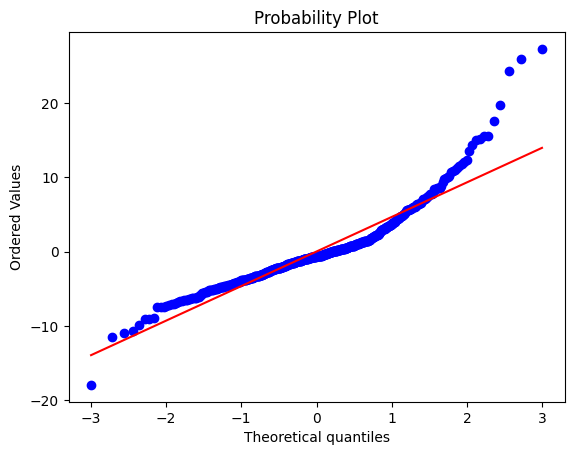

In [62]:
sp.stats.probplot(model1.resid, plot=plt)
plt.show()

Shapiro-Wilks Normality Test

In [64]:
sp.stats.shapiro(model1.resid)

ShapiroResult(statistic=0.8966679573059082, pvalue=5.6242946338654915e-18)

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
variance_inflation_factor(model1.params, )

IndexError: tuple index out of range

### 정규성

회귀모델의 잔차가 정규분포를 따라야 한다는 가정

<br>

확인방법 <br>
- shapiro-wilk test
- QQ plot (scipy.stats.probplot)

<br>

정규성을 만족하지 않을 시 아래의 방법 사용 가능 <br>
- 변수 변환 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ex) box-cox transform
- Maximum Likelihood Estimation

In [ ]:
model1.resid

### 독립성

독립변수간 상관관계가 없어야 한다는 가정 <br>
다중 회귀분석에서 사용 <br>
<br>

확인 방법
- pd.DataFrame.corr()
- variance_inflation_factor (statsmodels)

<br>

독립성을 만족하지 않을 시 아래의 방법 사용 가능
- 상관계수가 높은 변수 제거
- 다중공선성이 높은 변수 제거
- 파생변수 생성
- PCA 등의 차원 축소

In [114]:
zipdate.columns

Index(['const', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(date.iloc[:, :-1].values, i) for i in range(date.iloc[:, :-1].shape[1])]

[585.2652379423121,
 1.7921915474332413,
 2.298758178749441,
 3.9915964183460315,
 1.0739953275537886,
 4.393719847577493,
 1.933744435783257,
 3.1008255128153372,
 3.9559449063727263,
 7.484496335274478,
 9.00855394759707,
 1.7990840492488984,
 1.3485210764063758,
 2.9414910780919348]

### 등분산성

회귀모델의 잔차가 고른 분산을 가지고 있어야 한다는 가정

<br>

확인 방법 <br>
- levene과 bartlett
  - levene: 정규분포 가정 <br>
  - bartlett: 모든 분포에 사용 <br>
<br>

등분산을 만족하지 않을 시 아래의 방법 사용 가능
- WLS regression
- GLS regression

In [79]:
sp.stats.levene(model1.resid[:203], model.resid[203:])

LeveneResult(statistic=8.250234402389175, pvalue=0.004246387865414467)

In [80]:
sp.stats.bartlett(model1.resid[:203], model.resid[203:])

BartlettResult(statistic=30.695653554600828, pvalue=3.018404195233549e-08)

In [ ]:
model1.resid